# 0.0) Libraries and Helper Functions

## 0.1) Libraries

In [270]:
import warnings
import pandas as pd
import psycopg2 as pg
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## 0.2) Helper Functions

In [221]:
def jupyter_settings():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['font.size'] = 30
    
    sns.set()
jupyter_settings()

# 1) Data Extraction

In [293]:
# Credentials
credentials = pd.read_csv('conn.csv')

host = credentials['host'][0]
port = credentials['port'][0]
database = credentials['database'][0]
pwd = credentials['pwd'][0]
username = credentials['username'][0]

conn = pg.connect(user=username,
                  password = pwd,
                  host = host,
                  port = port,
                  database = database)

cursor = conn.cursor()


query_tables_users = """
    SELECT *
    FROM pa004.users u LEFT JOIN pa004.vehicle v  ON (u.id = v.id)
                       LEFT JOIN pa004.insurance i ON (u.id = i.id)
"""

df1 = pd.read_sql(query_tables_users, conn)
df1 = df1.drop(df1.columns[[5, 9]], axis = 1)

conn.close()

# 2) Data Description

In [223]:
df1

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,24,8.0,152.0,1,< 1 Year,No,1,38254.0,127,0
381105,Female,58,28.0,26.0,1,1-2 Year,Yes,0,39740.0,170,0
381106,Female,75,28.0,26.0,1,1-2 Year,No,1,51619.0,80,0
381107,Female,49,10.0,26.0,1,1-2 Year,Yes,0,34541.0,44,0


In [224]:
df2 = df1

In [225]:
df2.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


## 2.1) Data Types

In [226]:
df2.dtypes

gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 2.2) Check NA

In [227]:
df2.isna().sum()

gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 2.3) Data Dimensions

In [228]:
print('Number of Rows: {}'.format(df2.shape[0]))
print('Number of Columns: {}'.format(df2.shape[1]))

Number of Rows: 381109
Number of Columns: 11


## 2.4) Change Types

In [229]:
df2.dtypes

gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [230]:
#df2['gender'] = df2['gender'].apply(lambda x: 0 if x == 'Male' else 1)
#df2['region_code'] = df2['region_code'].astype(int)
#df2['policy_sales_channel'] = df2['policy_sales_channel'].astype(int)
#df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 0 if x == '< 1 Year' else 1 if x == '1-2 Year' else 2)
#df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [231]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])

# 3) Feature Engineering

In [232]:
df3 = df2

## 3.1) Hypothesis

**1.** In average, Female should buy car insurance.

**2.** Older people should buy car insurance.

**3.** Clients with vehicle damage should buy car insurance.

**4.** Clients with higher annual premium should buy car insurance.

**5.** Clients that don't have a driving license should not buy a car insurance.

# 4) Exploratory Data Analysis

In [233]:
df4 = df3

## 4.1) Numerical Attributes

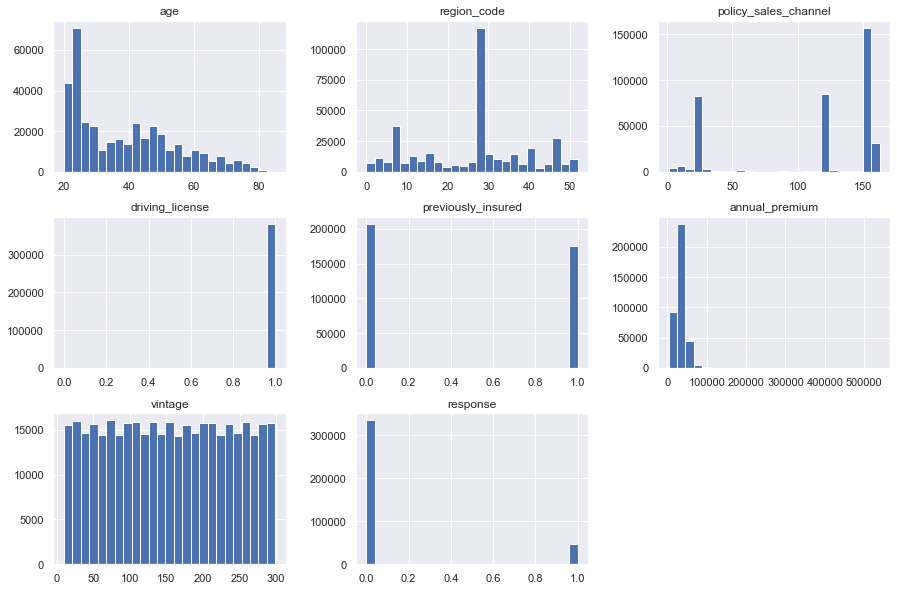

In [234]:
num_attributes.hist(bins=25);

## 4.2) Checking Hypothesis

### H1) In average, Female should buy car insurance. 

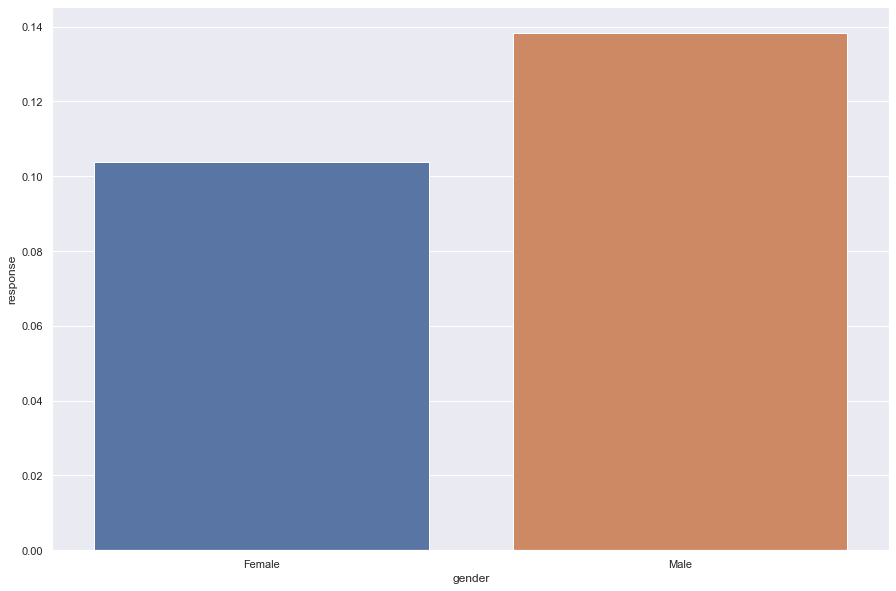

In [243]:
aux1 = df4[['gender', 'response']].groupby('gender').mean().reset_index()
sns.barplot(x='gender', y='response', data=aux1);

### H2) Older people should buy car insurance

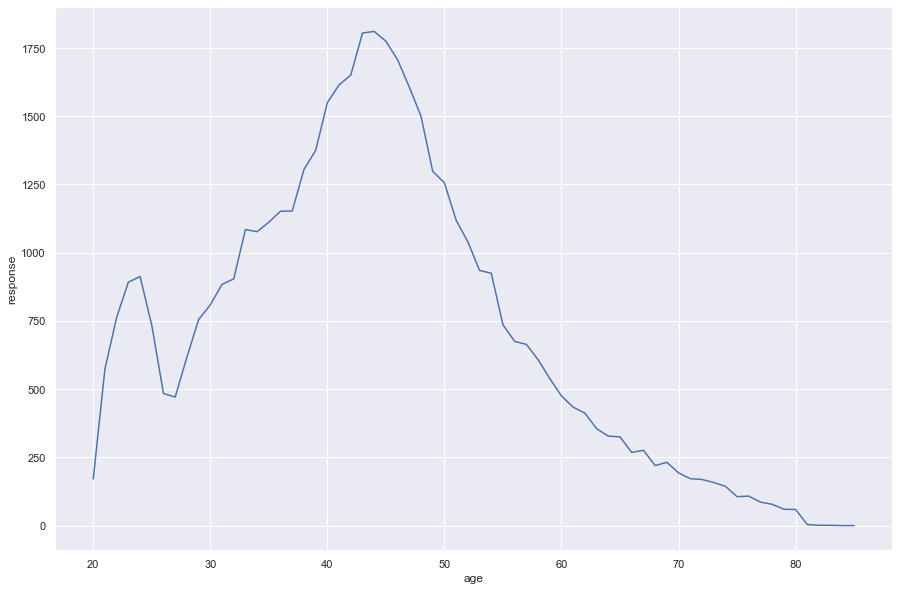

In [244]:
aux1 = df4[['age', 'response']].groupby('age').sum().reset_index()
sns.lineplot(x='age', y='response', data=aux1);

### H3: Clients with vehicle damage should buy more car insurance

<AxesSubplot:xlabel='vehicle_damage', ylabel='response'>

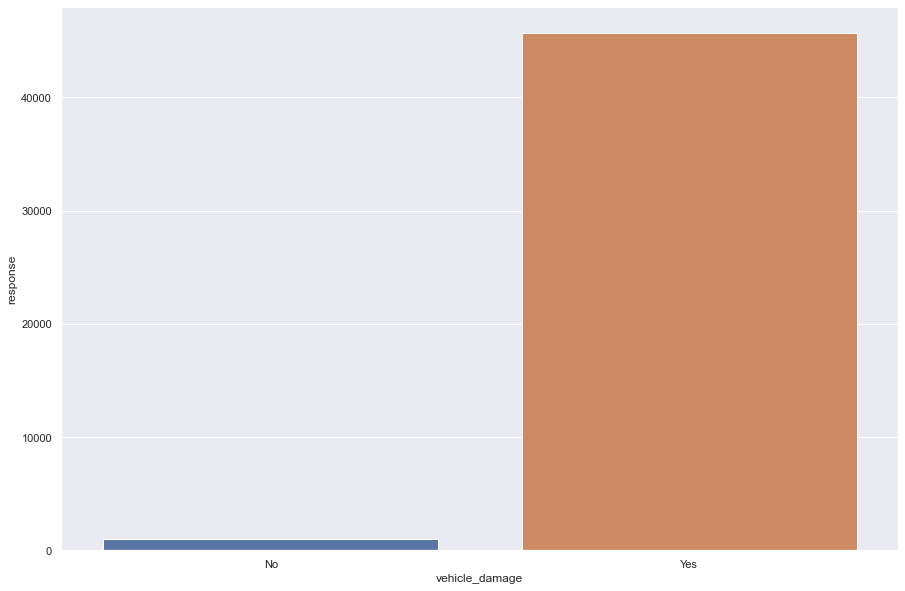

In [249]:
aux1 = df4[['response', 'vehicle_damage']].groupby('vehicle_damage').sum().reset_index()
sns.barplot(x='vehicle_damage', y='response', data=aux1)

### H4: Clients with higher annual premium should buy car insurance.

In [267]:
df4['annual_premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: annual_premium, dtype: float64

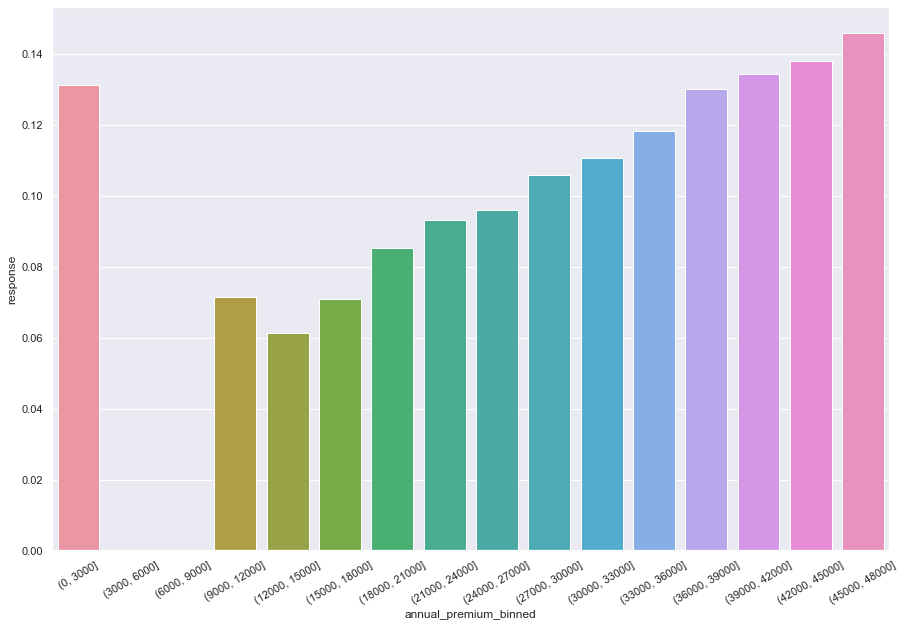

In [274]:
aux1 = df4[['response', 'annual_premium']].groupby('annual_premium').mean().reset_index()
# creating groups
bins = list(np.arange(0, 50000, 3000))
 
aux1['annual_premium_binned'] = pd.cut(aux1['annual_premium'], bins=bins)
aux2 = aux1[['annual_premium_binned', 'response']].groupby('annual_premium_binned').mean().reset_index()

sns.barplot(x='annual_premium_binned', y='response', data=aux2);
plt.xticks(rotation=30);

In [238]:

**5.** Clients that don't have a driving license should not buy a car insurance.

SyntaxError: invalid syntax (251719408.py, line 1)

In [255]:
df4

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,24,8.0,152.0,1,< 1 Year,No,1,38254.0,127,0
381105,Female,58,28.0,26.0,1,1-2 Year,Yes,0,39740.0,170,0
381106,Female,75,28.0,26.0,1,1-2 Year,No,1,51619.0,80,0
381107,Female,49,10.0,26.0,1,1-2 Year,Yes,0,34541.0,44,0
